# Task 2: Prediction using Unsupervised ML
For this task, I will predict the optimum number of clusters and represent it visually using the given ‘Iris’ dataset.
Programmer: Qudus Abolade
Date: 7|04|2023

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Data
The data can be found at https://bit.ly/3kXTdox
It includes the following columns:
- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species
Species would be the target variable, while the rest would be the features (minus the Id column).

In [2]:
# Load the dataset
iris_data = pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Get Features
As explained earlier, the features would be the columns without the target variable and Id column. This includes: SepalLengthCm, SepalWidthCm, PetalLengthCm, and  PetalWidthCm.

In [3]:
# Get the features
X = iris_data.iloc[:, [1, 2, 3, 4]].values

# Find optimum number of clusters
Using the elbow method, I will find the optimum number of clusters. The elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. This is perfect for finding the optimal number of clusters.

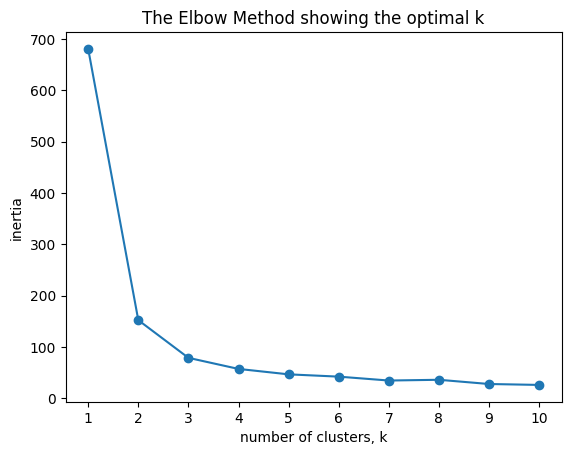

In [4]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
ks = range(1, 11)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init='auto')

    # Fit model to samples
    model.fit(X)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(ks)
plt.show()


# Evaluating the clustering
I will cluster the species into three clusters, and compare the clusters to the iris species using a cross-tabulation. The cross-tabulation is a table that shows the frequency distribution of one variable in rows and another variable in columns. It is used to summarize the relationship between two categorical variables.

In [5]:
# Evaluating the clustering
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3, n_init='auto')
# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': iris_data['Species']})
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])
# Display ct
print(ct)

varieties  Iris-setosa  Iris-versicolor  Iris-virginica
labels                                                 
0                    0               47              14
1                   50                0               0
2                    0                3              36


Based on the cross tab above, we can see that the clustering is not perfect. However, it is still a good model.
The clustering algorithm was able to accurately separate the Iris-setosa samples from the other two varieties.
However, the iris-versicolor samples were assigned to cluster 0, and 14 out of 50 Iris-virginica samples were assigned to cluster 0 as well. This suggests that some of the Iris-versicolor and Iris-virginica samples were grouped together by the clustering algorithm. This is because the data is not linearly separable.

# Visualize the clusters
Since we have confirmed that that 3 is the optimal number of clusters, I will now visualize the clusters.

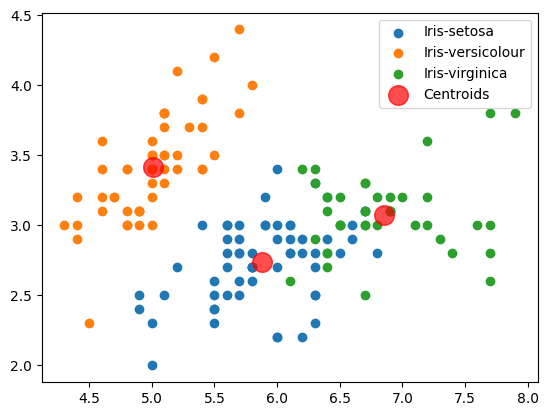

In [6]:
# Get the predicted clusters for the given data
y_kmeans = model.predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s=200, c='red', label = 'Centroids', alpha = 0.7)

plt.legend();